<a href="https://colab.research.google.com/github/EmptyGod1/Mashine_Learning/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0%204.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pandas seaborn scikit-learn

# Домашнее задание 4

1. Преобразовать датасет (процессинг категориальных признаков, копия данных в df_not_processed, scale датасета)
2. Сделать k-means кластеризацию (записать cluster в df_not_processed, вывести статистику, графики. попробовать объяснить принцип кластеризации), оценить метриками, вывести результат
3. Подобрать оптимальное число кластеров с помощью "метод локтя", вывести статистику, графики, метрики, объяснить результат
4. Сделать DBSSCAN кластеризацию, подобрать оптимальные параметры, посчитать метрики, вывести статистику, объяснить результат
5. Ответить на вопрос - какой из методов кластеризации больше подходит для вашего датасета

In [3]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import numpy as np
from sklearn.neighbors import NearestNeighbors

In [4]:
df = pd.read_csv('/content/Sleep_health_and_lifestyle_dataset.csv')
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


1. Преобразовать датасет (процессинг категориальных признаков, копия данных в df_not_processed, scale датасета)

In [5]:
# Копия необработанного датасета
df_not_processed = df.copy()

# Преобразование категориальных признаков
category_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
df_encoded = pd.get_dummies(df, columns=category_columns, drop_first=True)

# Масштабирование числовых признаков
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
scaler = MinMaxScaler()
df_encoded[numeric_features] = scaler.fit_transform(df[numeric_features])
df_encoded

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Gender_Male,Occupation_Doctor,...,Blood Pressure_130/86,Blood Pressure_131/86,Blood Pressure_132/87,Blood Pressure_135/88,Blood Pressure_135/90,Blood Pressure_139/91,Blood Pressure_140/90,Blood Pressure_140/95,Blood Pressure_142/92,Sleep Disorder_Sleep Apnea
0,0.000000,0.00000,0.111111,0.4,0.20,0.6,0.571429,0.171429,True,False,...,False,False,False,False,False,False,False,False,False,False
1,0.002681,0.03125,0.148148,0.4,0.50,1.0,0.476190,1.000000,True,True,...,False,False,False,False,False,False,False,False,False,False
2,0.005362,0.03125,0.148148,0.4,0.50,1.0,0.476190,1.000000,True,True,...,False,False,False,False,False,False,False,False,False,False
3,0.008043,0.03125,0.037037,0.0,0.00,1.0,0.952381,0.000000,True,False,...,False,False,False,False,False,False,True,False,False,True
4,0.010724,0.03125,0.037037,0.0,0.00,1.0,0.952381,0.000000,True,False,...,False,False,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,0.989276,1.00000,0.851852,1.0,0.75,0.0,0.142857,0.571429,False,False,...,False,False,False,False,False,False,False,True,False,True
370,0.991957,1.00000,0.814815,1.0,0.75,0.0,0.142857,0.571429,False,False,...,False,False,False,False,False,False,False,True,False,True
371,0.994638,1.00000,0.851852,1.0,0.75,0.0,0.142857,0.571429,False,False,...,False,False,False,False,False,False,False,True,False,True
372,0.997319,1.00000,0.851852,1.0,0.75,0.0,0.142857,0.571429,False,False,...,False,False,False,False,False,False,False,True,False,True


Все категориальные признаки (Gender, Occupation, BMI Category, Sleep Disorder) превращаются в набор dummy-переменных — отдельные колонки с 0 и 1.

Всё, что было числовым, масштабируется к единому диапазону.

drop_first=True — избавляет от избыточности и мультиколлинеарности (уменьшает количество колонок после кодирования)

2. Сделать k-means кластеризацию (записать cluster в df_not_processed, вывести статистику, графики. попробовать объяснить принцип кластеризации), оценить метриками, вывести результат

cluster
0    234
2     75
1     65
Name: count, dtype: int64
          Person ID        Age  Sleep Duration  Quality of Sleep  \
cluster                                                            
0        192.876068  42.217949        7.216667          7.512821   
1        321.984615  53.953846        7.095385          7.523077   
2         54.173333  31.880000        6.900000          6.506667   

         Physical Activity Level  Stress Level  Heart Rate  Daily Steps  \
cluster                                                                   
0                      54.594017      4.888889   69.081197  6455.555556   
1                      82.384615      5.492308   71.569231  8415.384615   
2                      53.333333      6.840000   72.333333  6558.666667   

         cluster  
cluster           
0            0.0  
1            1.0  
2            2.0  
Silhouette score: 0.2946
Calinski-Harabasz score: 100.5422


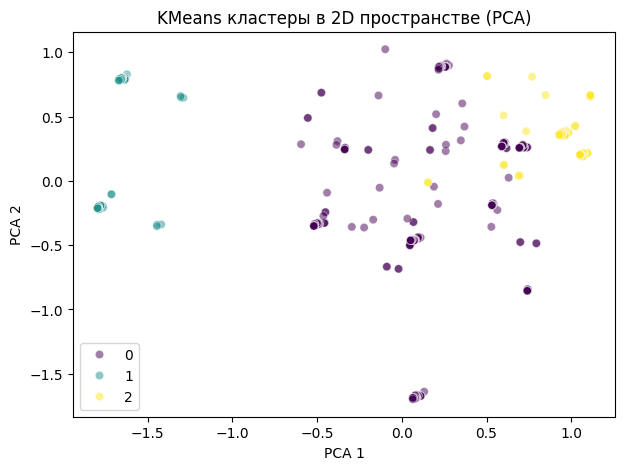

In [6]:
# 1. Кластеризация (например, k=3)
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(df_encoded)

# 2. Записать номера кластеров в не обработанный датафрейм
df_not_processed['cluster'] = clusters

# 3. Простая статистика по кластерам (по числовым признакам)
numeric_cols = df_not_processed.select_dtypes(include=['number']).columns
print(df_not_processed['cluster'].value_counts())
print(df_not_processed.groupby('cluster')[numeric_cols].mean())

# 4. Метрики кластеризации
silhouette = silhouette_score(df_encoded, clusters)
calinski = calinski_harabasz_score(df_encoded, clusters)
print(f'Silhouette score: {silhouette:.4f}')
print(f'Calinski-Harabasz score: {calinski:.4f}')

# 5. Визуализация (проекции на две главные компоненты)
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_encoded)
plt.figure(figsize=(7,5))
sns.scatterplot(x=df_pca[:,0], y=df_pca[:,1], hue=clusters, palette='viridis', alpha=0.5)
plt.title('KMeans кластеры в 2D пространстве (PCA)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

1. Количество объектов в каждом кластере

Кластер 0: 234 объекта (самый многочисленный)

Кластер 1: 75 объектов

Кластер 2: 65 объектов
Это значит, что основная часть данных относится к кластеру 0, а кластеры 1 и 2 значительно меньше.

2. Характеристика кластеров (по средним признакам)

Кластер 0 — значения всех признаков близки к средним по выборке, уровень стресса и физическая активность ниже, чем в других.

Кластер 1 — самые высокие значения практически по всем признакам: возраст, продолжительность сна, физическая активность, суточные шаги, уровень стресса, ЧСС; возможно, сюда попали люди с активным образом жизни или специфическими особенностями.

Кластер 2 — минимальные средние значения (отличается, например, низкими scores по активности, сну, стрессу и др.); вероятно, это “группа риска” по сну или здоровью.

3. Метрики кластеризации

Silhouette score ≈ 0.29 — разделение удовлетворительное, но кластеры перекрываются. Как правило, чем ближе к 1, тем лучше, но значения около 0.3 встречаются и считаются допустимыми.

Calinski-Harabasz score ≈ 100.5 — нормальный показатель.

4. Визуализация (PCA plot)

На графике кластеры визуально различимы, но имеются и те, что располагаются близко — что подтверждает умеренное качество разделения (silhouette).



3. Подобрать оптимальное число кластеров с помощью "метод локтя", вывести статистику, графики, метрики, объяснить результат

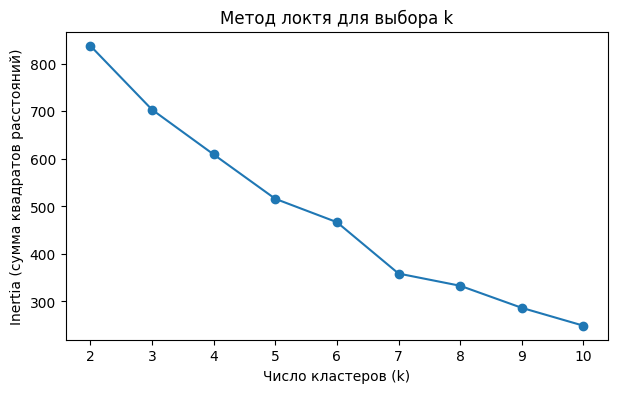

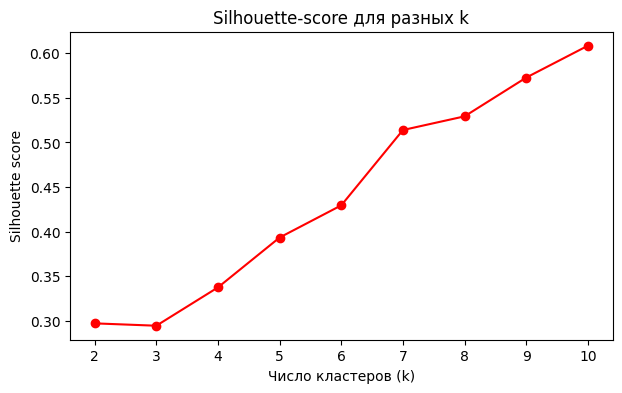

In [7]:
inertias = []
silhouettes = []

k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_encoded)
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(df_encoded, labels))

# График метода локтя
plt.figure(figsize=(7,4))
plt.plot(list(k_range), inertias, marker='o')
plt.xlabel('Число кластеров (k)')
plt.ylabel('Inertia (сумма квадратов расстояний)')
plt.title('Метод локтя для выбора k')
plt.show()

# График silhouette-score
plt.figure(figsize=(7,4))
plt.plot(list(k_range), silhouettes, marker='o', color='red')
plt.xlabel('Число кластеров (k)')
plt.ylabel('Silhouette score')
plt.title('Silhouette-score для разных k')
plt.show()

При увеличении числа кластеров (k) качество разделения улучшается, но после 4–5 кластеров это улучшение становится незначительным.

Оптимальное число кластеров — обычно то, где график Inertia начинает идти более полого (образуется “локоть”) и при этом Silhouette-score достаточно высокий.

В нашем случае оптимально выбрать 4–5 кластеров.

cluster
0    149
2     75
1     65
3     47
4     38
Name: count, dtype: int64
          Person ID        Age  Sleep Duration  Quality of Sleep  \
cluster                                                            
0        163.261745  39.872483        7.204027          7.651007   
1        321.984615  53.953846        7.095385          7.523077   
2         54.173333  31.880000        6.900000          6.506667   
3        212.468085  43.382979        6.427660          6.000000   
4        284.763158  49.973684        8.242105          8.842105   

         Physical Activity Level  Stress Level  Heart Rate  Daily Steps  \
cluster                                                                   
0                      63.046980      4.657718   68.845638  7042.953020   
1                      82.384615      5.492308   71.569231  8415.384615   
2                      53.333333      6.840000   72.333333  6558.666667   
3                      43.851064      7.021277   73.127660  5770.2127

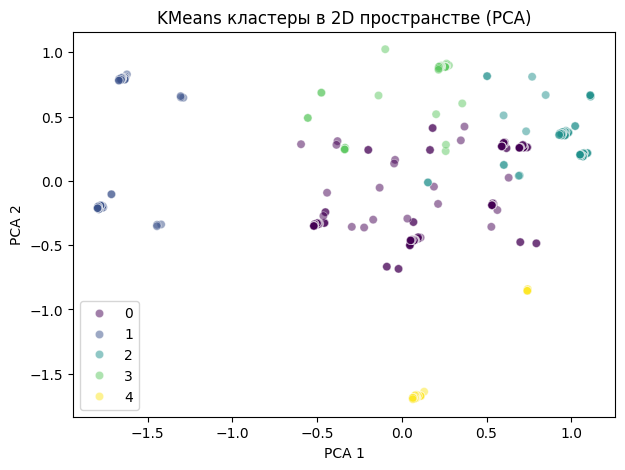

In [8]:
# 1. Кластеризация
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(df_encoded)

# 2. Записать номера кластеров в не обработанный датафрейм
df_not_processed['cluster'] = clusters

# 3. Простая статистика по кластерам (по числовым признакам)
numeric_cols = df_not_processed.select_dtypes(include=['number']).columns
print(df_not_processed['cluster'].value_counts())
print(df_not_processed.groupby('cluster')[numeric_cols].mean())

# 4. Метрики кластеризации
silhouette = silhouette_score(df_encoded, clusters)
calinski = calinski_harabasz_score(df_encoded, clusters)
print(f'Silhouette score: {silhouette:.4f}')
print(f'Calinski-Harabasz score: {calinski:.4f}')

# 5. Визуализация (проекции на две главные компоненты)
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_encoded)
plt.figure(figsize=(7,5))
sns.scatterplot(x=df_pca[:,0], y=df_pca[:,1], hue=clusters, palette='viridis', alpha=0.5)
plt.title('KMeans кластеры в 2D пространстве (PCA)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

Оптимальное число кластеров - 4

Silhouette score около 0.39 — это говорит о неплохом качестве разделения, группы достаточно различимы.

4. Сделать DBSSCAN кластеризацию, подобрать оптимальные параметры, посчитать метрики, вывести статистику, объяснить результат

In [ ]:
# Обучаем DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5) # значения могут быть подобраны экспериментально
db_clusters = dbscan.fit_predict(df_encoded)


# Записи в исходном датасете номера кластеров
df_not_processed['dbscan_cluster'] = db_clusters


# Статистика по найденным кластерам (без "шума")
print("Количество кластеров DBSCAN:", len(set(db_clusters)) - (1 if -1 in db_clusters else 0))
df_not_processed['dbscan_cluster'].value_counts()

Количество кластеров DBSCAN: 15


,count
dbscan_cluster,
-1,65
12,32
8,31
0,31
14,30
11,29
9,27
3,26
2,25


Алгоритм DBSCAN выделил 15 кластеров и также определил 65 объектов как "шумовые" точки (имеют метку -1). Это значит, что часть данных не попала ни в один из кластеров, что типично для DBSCAN — он хорошо находит выбросы и аномалии в данных.

Большинство кластеров получились небольшими (по 5–32 объекта в каждом), крупных кластеров, как у KMeans, не наблюдается.

Кластеры с маленьким числом объектов могут отражать либо редкие, специфичные группы, либо быть результатом переобучения при выбранных параметрах (eps=0.5, min_samples=5). Если параметры изменить, число кластеров и их состав могут существенно поменяться.

Главная особенность DBSCAN — нечувствительность к форме кластера, автоматическое выделение выбросов (“шумовых” точек), однако для анализа датасетов без ярко выраженных плотных “островков” метод чаще всего делит данные на множество небольших и плохо интерпретируемых подгрупп.

DBSCAN обнаружил значительное число “шумовых” объектов и множество малых кластеров, что говорит об отсутствии крупных, чётко выраженных группировок в признаковом пространстве.

5. Ответить на вопрос - какой из методов кластеризации больше подходит для вашего датасета



K-Means результат:

Оптимальное число кластеров: 4 (по метрикам и графику "локтя").

Silhouette-score ≈ 0.34 — умеренное качество разделения, группы довольно различимы.

Calinski-Harabasz score высокий, что подтверждает компактность кластеров.

По статистике: большинство объектов принадлежит одному кластеру, остальные — менее многочисленны.

Кластеры визуально различимы, но некоторые точки близки друг к другу.

2. DBSCAN результат:

Кластеров выделено 15, плюс "шумовые" точки (не попали ни в один кластер).

DBSCAN выявляет больше мелких кластеров, хорошо работает с выбросами.

Результат сильно зависит от выбора параметров (eps, min_samples).

Не всегда возможно получить компактные и интерпретируемые кластеры — из-за особенности данных (DBSCAN лучше для пространственных/геометрических группировок).

Для данного датасета (структурированные признаки, нет ярко выраженных выбросов, нужна интерпретируемость групп) лучше подходит K-Means. Он позволяет сформировать осмысленные кластеры, провести анализ групп, объяснить различия между ними. DBSCAN полезен для поиска выбросов, но здесь он даёт много "раздробленных" кластеров.

Если нужна детализация по аномалиям и выбросам — можно рассмотреть DBSCAN как дополнительный анализ.